In [24]:
# to change the function call stack limit for recursive function calls
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

30000
10000


In [3]:
#brute force algorithjm
import numpy as np
def knapsack_bruteForce(values, weights, length, capacity):
  arrayOfSubsets = np.zeros_like(values)
  maxValue = 0
  
  # loop through 2^n subsets
  for i in range(pow(2,length)):
    index = 0
    totalValueOfSubset = 0
    totalWeightOfSubset = 0
    
    #arrayOfSubsets- to choose the subsets of items to be placed in knapsack
    #if item i is choosen to be in subset then arrayOfSubsets[i] is 1 or 0  
    while arrayOfSubsets[index] != 0 and index < length-1 :
      arrayOfSubsets[index] = 0
      index = index + 1
    arrayOfSubsets[index] = 1
    
    # calculate total value and total weight for each subset
    for j in range(length):
    # calculate total value and total weight for each subset
      if arrayOfSubsets[j] == 1:
        totalValueOfSubset = totalValueOfSubset + values[j]
        totalWeightOfSubset = totalWeightOfSubset + weights[j]
    
    #calculate maximum value of all subsets that doesnot violate capacity of kanpsack
    if totalValueOfSubset > maxValue and totalWeightOfSubset <= capacity :
      maxValue = totalValueOfSubset
      arrayOfIndices = []
    #get indices of items that has maximum total value and whose total weight < capacity
      for k in range(len(arrayOfSubsets)):
        if arrayOfSubsets[k] == 1:
          arrayOfIndices.append(k)
  
  return maxValue,arrayOfIndices

In [7]:
#dynamic programming bottomUp approach
def knapsackDynamic_bottomUp(values, weights, length, capacity):
  
  W = capacity + 1              # capacity of knapSack
  L = length + 1                #number of items with values to be placed in knapSack
  knapSack = np.empty((L, W))   # build knapSack of size nXW
  #initialize the first row of knapSack with 0 
  
  for w in range(W):
    knapSack[0][w] = 0  
  
  for i in range(1,L):
    index = i - 1
    for w in range(W):
    # if the weight of item i is greater that capacity of knapSack then it is not placed in knapSack
        if weights[index] > w :
            knapSack[i][w] = knapSack[i-1][w]
    # if the weight of item i doesnot exceed capacity then max(previousItem with value , currentItem with Value) 
    # is choosen to be placed in knapSack
        else :
            knapSack[i][w] = max(knapSack[i-1][w], values[index] + knapSack[i-1][w-weights[index]])
  
  backTrack_knapSack(knapSack, values, weights, length, capacity)

In [26]:
#to backTrack through the knapSack[1,2...n][1,2,...W] to get indices of items placed in knapSack
def backTrack_knapSack(array, values, weights, length, capacity):
  i = length
  w = capacity
  arrayOfIndices = []
  while i > 0 and w > 0:
    index = i - 1
    if weights[index] <= w :
      if (values[index] + array[i-1][w-weights[index]]) > array[i-1][w] :
        arrayOfIndices.append(index)
        i = index
        w = w - weights[index]
      else:
        i = index
    else:
      i = i - 1
  #print(arrayOfIndices)

In [11]:
#dynamic programming topdown approach
def knapsackDynamic_topdown(values, weights, length, capacity):
    
  L = length + 1                    # capacity of knapSack
  W = capacity + 1                  #number of items with values to be placed in knapSack
  knapSack = np.empty((L, W))       # build knapSack of size nXW
    
  #initialize the  rows and columns of knapSack with 0 
  for i in range(L):
    for w in range(W):
      knapSack[i][w] = 0
  
  maxValue = knapsack_recursion(values, weights, knapSack, length, capacity)
  #print(maxValue)
  backTrack_knapSack(knapSack, values, weights, length, capacity)

In [10]:
def knapsack_recursion(values, weights, knapSack, currentIndex, capacity):
    
  # the currentIndex starts from last row of knapSack and ends at first row
  # the capacity start with maximum capacity i.e., W and decrements to 0
  # base case for recursion
    
  if currentIndex <= 0 or capacity < 0:
    return 0
    
  # if the weight of item i is greater that capacity of knapSack then it is not placed in knapSack
  if weights[currentIndex - 1] > capacity :
    knapSack[currentIndex][capacity] = knapsack_recursion(values, weights, knapSack, currentIndex-1, capacity)
  # if the weight of item i doesnot exceed capacity then max(previousItem with value , currentItem with Value) 
  # is choosen to be placed in knapSack     
  else:
    knapSack[currentIndex][capacity] = max( knapsack_recursion(values, weights, knapSack, currentIndex-1, capacity),
                                        values[currentIndex - 1] + knapsack_recursion(values, weights, knapSack, currentIndex-1, capacity-weights[currentIndex - 1]) )
    
    #return max value
    return knapSack[currentIndex][capacity]

In [2]:
# values and weights data sets generation
from numpy.random import seed
from numpy.random import randint
import random
# to generate random vales and weights, if string == 'unique' then samples without duplicates are genrated
# else there might be some duplicates
def randomValuesAndWeightsGeneration(string, low, high, samples):
  # seed random number generator
  seed(1)
  # generate unique integer values 
  if string == 'unique' :    
    values = random.sample(range(low, high), samples)
    weights = random.sample(range(low, high), samples)
  else:
    values = randint(low, high, samples)
    weights = randint(low, high, samples)
  return values,weights

In [5]:
# calculate execution time for each algorithm for different input sizes
import time
def runtimeCalculation(functionName, items, itemWeights, capacity):
  start_time = time.process_time()
  functionName(items, itemWeights, len(items), capacity)
  execution_time = time.process_time() - start_time 
  return execution_time

In [1]:
# get excution time for each algorithm for varying input sizes
import matplotlib.pyplot as plt
import numpy as np
def getExecutionTime_varyDataSize(function, values, weights, capacity, low, high, stepsize):
  executionTime = []
  averageExecutionTime = 0
  for n in range(low, high, stepsize):
    for i in range(5):
      items = values[:n]                  
      itemWeights = weights[:n]
      averageExecutionTime = averageExecutionTime + runtimeCalculation(function, items, itemWeights, capacity)
    averageExecutionTime = averageExecutionTime / 5
    executionTime.append(averageExecutionTime)
  #print(executionTime)
  return executionTime


# get excution time for each algorithm for varying capacities
import matplotlib.pyplot as plt
import numpy as np
def getExecutionTime_varyCapacity(function, values, weights, low, high, stepsize):
  executionTime = []
  averageExecutionTime = 0
  for capacity in range(low, high, stepsize):
    for i in range(5):
      averageExecutionTime = averageExecutionTime + runtimeCalculation(function, values, weights, capacity)
    averageExecutionTime = averageExecutionTime / 5
    executionTime.append(averageExecutionTime)
  #print(executionTime)
  return executionTime

In [25]:

def runTime_AllAlgorithms_varyDataSize():
    
  #to get random values an weights with duplicates  
  values,weights = randomValuesAndWeightsGeneration('non-unique', 1, 21, 20)   
    
  #to get random values an weights without duplicates    
  #values,weights = randomValuesAndWeightsGeneration('unique', 1, 21, 20)   
  
  # get execution times
  executiontime_Bottomup = getExecutionTime_varyDataSize(knapsackDynamic_bottomUp, values, weights, 15, 5, 21 ,5)
  executiontime_Topdown = getExecutionTime_varyDataSize(knapsackDynamic_topdown, values, weights, 15, 5, 21 ,5)
  executiontime_Bruteforce = getExecutionTime_varyDataSize(knapsack_bruteForce, values, weights, 15, 5, 21 ,5)   

  # to plot graphs  
  plotGraphs_AllAlgorithms_varyDataSize('runtime vs datasize',executiontime_Bottomup,executiontime_Topdown,
                             executiontime_Bruteforce, 5, 21 ,5)

#Plot graphs for excution time Vs input size  for all three aproaches
def plotGraphs_AllAlgorithms_varyDataSize(string, bottomUp, topDown, bruteForce, low, high, stepsize): 
    
  datasize = np.arange(low, high, stepsize)
  fig, ax1 = plt.subplots()
  if string == 'runtime vs datasize' :
    ax1.set_xlabel('data size')
  else:
    ax1.set_xlabel('capacity')
  # y axis for bottom up
  ax1.set_ylabel('runtime in seconds DP  algorithms')
  lns1 = ax1.plot(datasize, bottomUp, label='bottom-up dyanamic', color='r')
  lns2 = ax1.plot(datasize, topDown, label='topDown dyanamic',color='b')
  ax1.tick_params(axis='y', labelcolor = 'r')
    
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  #y-axis for brute force
  ax2.set_ylabel('runtime in seconds brute force')  # we already handled the x-label with ax1
  lns3 = ax2.plot(datasize, bruteForce, label='brute Force',color='g')
  ax2.tick_params(axis='y', labelcolor = 'g')

  

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
  # legend
  lns = lns1+lns2 +lns3
  labs = [l.get_label() for l in lns]
  ax1.legend(lns, labs, loc=0)
  plt.show()

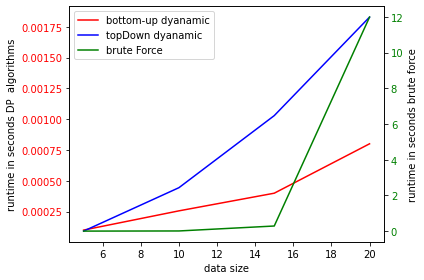

In [ ]:
runTime_AllAlgorithms_varyDataSize()

In [ ]:

def runTime_AllAlgorithms_varyCapacity():
    
    #to get random values an weights with duplicates  
    #values,weights = randomValuesAndWeightsGeneration('non-unique', 1, 21, 20)   
    
    #to get random values an weights without duplicates    
    values,weights = randomValuesAndWeightsGeneration('unique', 1, 21, 20)   
    
    executiontime_Bottomup = getExecutionTime_varyCapacity(knapsackDynamic_bottomUp, values, weights, 10, 100, 10 )
    executiontime_Topdown = getExecutionTime_varyCapacity(knapsackDynamic_topdown, values, weights, 10, 100, 10)
    executiontime_Bruteforce = getExecutionTime_varyCapacity(knapsack_bruteForce, values, weights, 10, 100, 10)   
    
    plotGraphs_AllAlgorithms_varycapacity('runtime Vs capacity', executiontime_Bottomup, executiontime_Topdown, 
                             executiontime_Bruteforce, 10, 100, 10)
    

#Plot graphs for excution time Vs capacity  for all three aproaches
def plotGraphs_AllAlgorithms_varycapacity(string, bottomUp, topDown, bruteForce, low, high, stepsize): 
    
  datasize = np.arange(low, high, stepsize)
  fig,host  = plt.subplots()

  par1 = host.twinx()
  par2 = host.twinx()

  if string == 'runtime vs datasize' :
    host.set_xlabel('data size')
  else:
    host.set_xlabel('capacity')

  host.set_ylabel("runtime in seconds DP bottomup")
  par1.set_ylabel("runtime in seconds brute force")
  par2.set_ylabel("runtime in seconds DP top down algorithms")

  color1 = plt.cm.viridis(0)
  color2 = plt.cm.viridis(0.5)
  color3 = plt.cm.viridis(.9)

  p1, = host.plot(datasize, bottomUp, label='bottom-up', color=color1)
  p2, = par1.plot(datasize, bruteForce, label='bruteforce', color=color2)
  p3, = par2.plot(datasize, topDown, label='topDown', color=color3)

  lns = [p1, p2, p3]
  host.legend(handles=lns, loc='lower right')

  # right, left, top, bottom
  par2.spines['right'].set_position(('outward', 60))      
 

  host.yaxis.label.set_color(p1.get_color())
  par1.yaxis.label.set_color(p2.get_color())
  par2.yaxis.label.set_color(p3.get_color())

  #fig.tight_layout()
  plt.show()

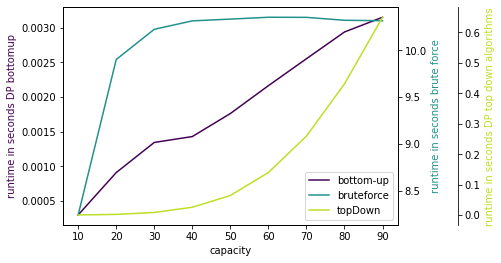

In [ ]:
runTime_AllAlgorithms_varyCapacity()

In [ ]:
# get execution times for DP top down and bottom up algorithms
def runTime_DPAlgorithms_varyDataSize():
    
  values,weights = randomValuesAndWeightsGeneration('non-unique', 1, 5001, 5000)
  #values,weights = randomValuesAndWeightsGeneration('unique', 1, 5001, 5000)
    
  executiontime_Bottomup = getExecutionTime_varyDataSize(knapsackDynamic_bottomUp, values, weights, 50, 500, 5001, 500)
  executiontime_Topdown = getExecutionTime_varyDataSize(knapsackDynamic_topdown, values, weights, 50, 500, 5001, 500)
  plotGraphs_DPAlgorithms_varyDataSize('runtime vs datasize', executiontime_Bottomup,executiontime_Topdown, 500, 5001, 500)


#Plot graphs for excution time Vs input size for Dp bottom up and top down
def plotGraphs_DPAlgorithms_varyDataSize(string, bottomUp, topDown, low, high, stepsize): 
  datasize = np.arange(low, high, stepsize)
  fig, ax1 = plt.subplots()

  color = 'tab:red'
  if string == 'runtime vs datasize' :
    ax1.set_xlabel('data size')
  else:
    ax1.set_xlabel('capacity')
  ax1.set_ylabel('runtime', color=color)
  lns1 = ax1.plot(datasize, bottomUp, label='bottom-up dyanamic', color=color)
  ax1.tick_params(axis='y', labelcolor=color)


  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('runtime', color=color)  # we already handled the x-label with ax1
  lns2 = ax2.plot(datasize, topDown, label='topDown dyanamic',color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
  # legend
  lns = lns1+lns2
  labs = [l.get_label() for l in lns]
  ax1.legend(lns, labs, loc=0)
  plt.show()
   

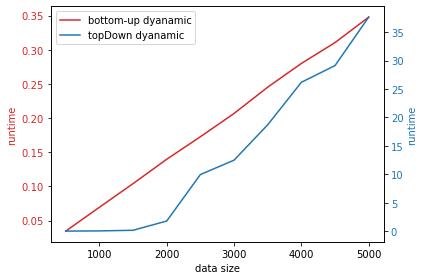

In [ ]:
runTime_DPAlgorithms_varyDataSize()